In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import silhouette_score


In [2]:
# Load the excel file(s) 
df = pd.read_excel('miles50_coventry.xlsx')

In [3]:
df.head()

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line
0,0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,375.40,0.00,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000
1,1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,148.41,0.00,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025
2,2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,170.94,0.00,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323
3,3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,42.26,7.17,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439
4,4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,124.36,0.00,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524


In [4]:
len(df)

4119

In [5]:
df.groupby(df.columns.tolist(),as_index=False).size()

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,size
0,0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,375.40,0.00,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000,1
1,1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,148.41,0.00,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025,1
2,2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,170.94,0.00,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323,1
3,3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,42.26,7.17,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439,1
4,4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,124.36,0.00,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4121,NG8,Midlands,42.25,2286675,847974,2023-04-06 14:29:14.100,Dispatched,Payment Gateway,DX Freight,120.50,0.00,2023-04-06,11.36,United Kingdom,21.00,1.250000,1.250000,1
4115,4122,MK43,Midlands,46.14,2299291,848793,2023-04-21 17:10:04.240,Dispatched,Payment Gateway,DX Express,57.78,7.17,2023-04-24,6.76,United Kingdom,7.20,0.019250,0.061473,1
4116,4123,GL1,Midlands,47.05,2286559,851414,2023-04-06 13:29:21.527,Dispatched,Payment Gateway,DX Express,42.42,7.20,2023-04-06,6.79,United Kingdom,13.14,0.140650,0.082143,1
4117,4124,NN11,Midlands,19.77,2288157,858296,2023-04-11 11:41:11.387,Dispatched,Paypal,DX Freight,31.44,12.23,2023-04-11,10.92,United Kingdom,13.20,0.144000,0.100000,1


In [6]:
# Create new DF with relevant details 
df1 = df[['outward_code_x','distance', 'Courier', 'DeliveryCost', 'Weight_per_line',
         'Volume_per_line_m3', 'Pallet_per_line', 'OrderDate', 'DateDespatched']].copy()

In [7]:
# Check dates are correctly formatted 
df1.dtypes

outward_code_x                object
distance                     float64
Courier                       object
DeliveryCost                 float64
Weight_per_line              float64
Volume_per_line_m3           float64
Pallet_per_line              float64
OrderDate             datetime64[ns]
DateDespatched        datetime64[ns]
dtype: object

In [8]:
# Update Dateformat 
df1['OrderDate'] = pd.to_datetime(df1['OrderDate']) 
df1['OrderDate'] = df1['OrderDate'].dt.strftime('%d/%m/%Y')


In [9]:
df1.head(5)

,outward_code_x,distance,Courier,DeliveryCost,Weight_per_line,Volume_per_line_m3,Pallet_per_line,OrderDate,DateDespatched
0,DY6,26.84,MFS,34.46,110.00,0.225000,0.200000,18/04/2023,2023-04-18
1,OX18,43.04,DX Freight,14.77,29.24,0.219678,0.200025,16/04/2023,2023-04-17
2,CV5,2.34,DX Freight,14.45,28.50,0.044060,0.044323,05/04/2023,2023-04-05
3,WS15,29.80,DX Express,6.76,8.56,0.053674,0.028439,20/04/2023,2023-04-20
4,MK1,44.21,DX Freight,22.28,48.74,0.090629,0.059524,31/03/2023,2023-03-31


In [10]:
# Reading the Excel file of coordinate information into a Pandas DataFrame
long_lat = pd.read_csv('UK-Postcodes.csv')

# Viewing the DataFrame
long_lat.head()

,id,outcode,latitude,longitude
0,1,AB10,57.131086,-2.122482
1,2,AB11,57.131210,-2.082261
2,3,AB12,57.098381,-2.172400
3,4,AB13,57.108000,-2.237000
4,5,AB14,57.101000,-2.270000


In [11]:
# Merging the long-lat and customers_cleaned DataFrames into a new one
# Carrying out a left join to get a latitude and longitiude for each of our postcodes
df2 = pd.merge(df1, long_lat, 
                    left_on = 'outward_code_x',
                    right_on = 'outcode',
                    how = 'left')

In [12]:
df2.head()

,outward_code_x,distance,Courier,DeliveryCost,Weight_per_line,Volume_per_line_m3,Pallet_per_line,OrderDate,DateDespatched,id,outcode,latitude,longitude
0,DY6,26.84,MFS,34.46,110.00,0.225000,0.200000,18/04/2023,2023-04-18,766,DY6,52.496759,-2.173682
1,OX18,43.04,DX Freight,14.77,29.24,0.219678,0.200025,16/04/2023,2023-04-17,1934,OX18,51.767526,-1.582311
2,CV5,2.34,DX Freight,14.45,28.50,0.044060,0.044323,05/04/2023,2023-04-05,597,CV5,52.424186,-1.562449
3,WS15,29.80,DX Express,6.76,8.56,0.053674,0.028439,20/04/2023,2023-04-20,2915,WS15,52.765303,-1.911238
4,MK1,44.21,DX Freight,22.28,48.74,0.090629,0.059524,31/03/2023,2023-03-31,1664,MK1,52.006042,-0.726102


In [13]:
# Count rows where longitude and latitude are null values

len(df2)

4119

In [14]:
# Remove rows where the longitude and Latitude are null values

df2.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)

In [15]:
# Variable with the Longitude and Latitude
X=df2.loc[:,['id','latitude','longitude']]
X.head(10)

,id,latitude,longitude
0,766,52.496759,-2.173682
1,1934,51.767526,-1.582311
2,597,52.424186,-1.562449
3,2915,52.765303,-1.911238
4,1664,52.006042,-0.726102
5,1820,52.964498,-1.213406
6,1029,51.880284,-1.875728
7,1029,51.880284,-1.875728
8,1473,52.677164,-1.020786
9,584,52.347041,-1.366452


In [16]:
len(X)

4119

C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\clust

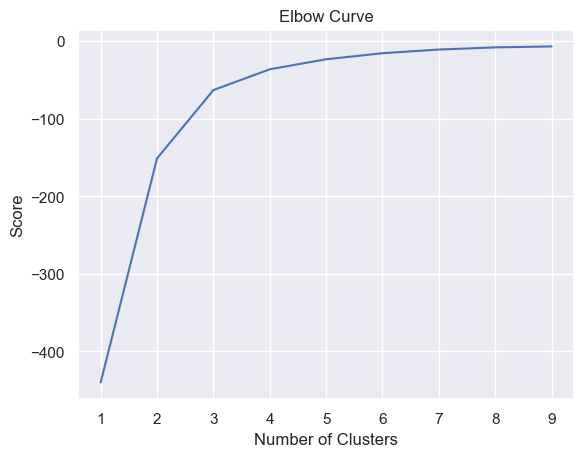

In [17]:
# Produce Elbow Curve
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df2[['latitude']]
X_axis = df2[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualise
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\clust

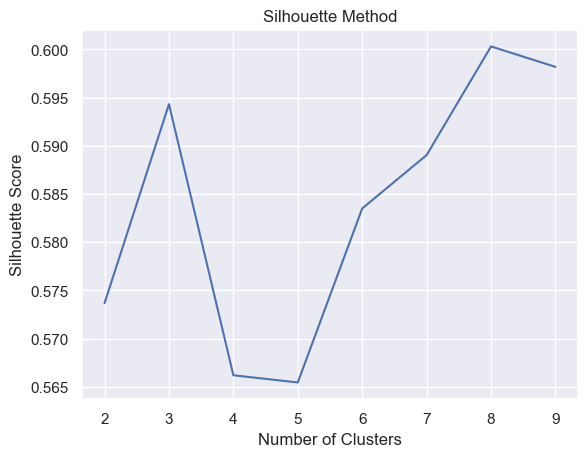

In [18]:
# Use the Silhouette method 

sil = []
K_clusters = range(2,10)

for k in K_clusters:
  kmeans = KMeans(n_clusters = k).fit(Y_axis)
  labels = kmeans.labels_
  sil.append(silhouette_score(Y_axis, labels, metric = 'euclidean'))

plt.plot(K_clusters, sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kesha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,latitude,longitude,cluster_label
0,766,52.496759,-2.173682,1
1,1934,51.767526,-1.582311,2
2,597,52.424186,-1.562449,0
3,2915,52.765303,-1.911238,1
4,1664,52.006042,-0.726102,2
5,1820,52.964498,-1.213406,0
6,1029,51.880284,-1.875728,1
7,1029,51.880284,-1.875728,1
8,1473,52.677164,-1.020786,0
9,584,52.347041,-1.366452,0


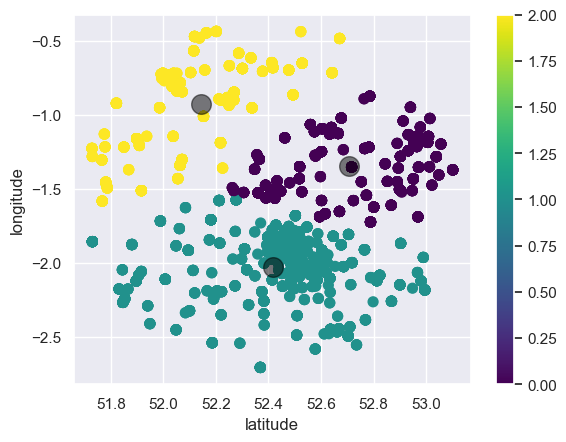

In [20]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [21]:
#Remove Longitute and Latitude from X 
X = X[['id','cluster_label']]
X.head(5)

,id,cluster_label
0,766,1
1,1934,2
2,597,0
3,2915,1
4,1664,2


In [22]:
df2.head()

,outward_code_x,distance,Courier,DeliveryCost,Weight_per_line,Volume_per_line_m3,Pallet_per_line,OrderDate,DateDespatched,id,outcode,latitude,longitude
0,DY6,26.84,MFS,34.46,110.00,0.225000,0.200000,18/04/2023,2023-04-18,766,DY6,52.496759,-2.173682
1,OX18,43.04,DX Freight,14.77,29.24,0.219678,0.200025,16/04/2023,2023-04-17,1934,OX18,51.767526,-1.582311
2,CV5,2.34,DX Freight,14.45,28.50,0.044060,0.044323,05/04/2023,2023-04-05,597,CV5,52.424186,-1.562449
3,WS15,29.80,DX Express,6.76,8.56,0.053674,0.028439,20/04/2023,2023-04-20,2915,WS15,52.765303,-1.911238
4,MK1,44.21,DX Freight,22.28,48.74,0.090629,0.059524,31/03/2023,2023-03-31,1664,MK1,52.006042,-0.726102


In [23]:
len(df2)

4119

In [24]:
len(X)

4119

In [25]:
 df2['id'] = df2['id'].astype(str)

In [26]:
 X['id'] = X['id'].astype(str)

C:\Users\kesha\AppData\Local\Temp\ipykernel_15164\405912216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['id'] = X['id'].astype(str)


In [27]:
clustered_data = pd.merge(df2, X, on=['id'], how='outer')
clustered_data.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [28]:
clustered_data.head(10)

,outward_code_x,distance,Courier,DeliveryCost,Weight_per_line,Volume_per_line_m3,Pallet_per_line,OrderDate,DateDespatched,id,outcode,latitude,longitude,cluster_label
0,DY6,26.84,MFS,34.46,110.00,0.225000,0.200000,18/04/2023,2023-04-18,766,DY6,52.496759,-2.173682,1
1,DY6,26.84,DX Freight,16.45,33.30,0.959000,0.473039,28/03/2023,2023-03-28,766,DY6,52.496759,-2.173682,1
2,DY6,26.84,DX Freight,11.79,21.80,0.209100,0.222222,30/03/2023,2023-03-30,766,DY6,52.496759,-2.173682,1
3,DY6,26.84,DX Express,6.81,17.77,0.040200,0.030342,27/03/2023,2023-03-27,766,DY6,52.496759,-2.173682,1
4,DY6,26.84,DX Express,11.46,34.70,0.100552,0.052361,05/04/2023,2023-04-05,766,DY6,52.496759,-2.173682,1
5,DY6,26.84,DX Freight,20.55,44.20,0.123500,0.054167,14/04/2023,2023-04-14,766,DY6,52.496759,-2.173682,1
6,DY6,26.84,DX Freight,23.25,51.12,0.129600,0.100000,21/04/2023,2023-04-21,766,DY6,52.496759,-2.173682,1
7,DY6,26.84,DX Express,6.79,5.18,0.011429,0.009524,04/04/2023,2023-04-04,766,DY6,52.496759,-2.173682,1
8,DY6,26.84,DX Express,8.35,25.00,0.092000,0.067222,04/04/2023,2023-04-05,766,DY6,52.496759,-2.173682,1
9,DY6,26.84,DX Express,6.77,2.10,0.000612,0.006944,13/04/2023,2023-04-13,766,DY6,52.496759,-2.173682,1


In [29]:
len(clustered_data)

4115

In [30]:
clustered_data.head(12)

,outward_code_x,distance,Courier,DeliveryCost,Weight_per_line,Volume_per_line_m3,Pallet_per_line,OrderDate,DateDespatched,id,outcode,latitude,longitude,cluster_label
0,DY6,26.84,MFS,34.46,110.00,0.225000,0.200000,18/04/2023,2023-04-18,766,DY6,52.496759,-2.173682,1
1,DY6,26.84,DX Freight,16.45,33.30,0.959000,0.473039,28/03/2023,2023-03-28,766,DY6,52.496759,-2.173682,1
2,DY6,26.84,DX Freight,11.79,21.80,0.209100,0.222222,30/03/2023,2023-03-30,766,DY6,52.496759,-2.173682,1
3,DY6,26.84,DX Express,6.81,17.77,0.040200,0.030342,27/03/2023,2023-03-27,766,DY6,52.496759,-2.173682,1
4,DY6,26.84,DX Express,11.46,34.70,0.100552,0.052361,05/04/2023,2023-04-05,766,DY6,52.496759,-2.173682,1
5,DY6,26.84,DX Freight,20.55,44.20,0.123500,0.054167,14/04/2023,2023-04-14,766,DY6,52.496759,-2.173682,1
6,DY6,26.84,DX Freight,23.25,51.12,0.129600,0.100000,21/04/2023,2023-04-21,766,DY6,52.496759,-2.173682,1
7,DY6,26.84,DX Express,6.79,5.18,0.011429,0.009524,04/04/2023,2023-04-04,766,DY6,52.496759,-2.173682,1
8,DY6,26.84,DX Express,8.35,25.00,0.092000,0.067222,04/04/2023,2023-04-05,766,DY6,52.496759,-2.173682,1
9,DY6,26.84,DX Express,6.77,2.10,0.000612,0.006944,13/04/2023,2023-04-13,766,DY6,52.496759,-2.173682,1


In [31]:
unique_cluster_labels = clustered_data['cluster_label'].unique()
print(unique_cluster_labels)


[1 2 0]


In [32]:
clustered_data.to_csv('clustered_data.csv')

In [33]:
#Sensecheck the clusters 

cluster_0 = clustered_data[clustered_data['cluster_label'] == 0]

print(cluster_0)


     outward_code_x  distance     Courier  DeliveryCost  Weight_per_line  \
25              CV5      2.34  DX Freight         14.45            28.50   
26              CV5      2.34  DX Freight         19.95            42.44   
27              CV5      2.34  DX Freight         25.17            56.71   
28              CV5      2.34         MFS         34.46           177.66   
29              CV5      2.34  DX Express          6.80            14.76   
...             ...       ...         ...           ...              ...   
4074           CV12      7.58  DX Express          6.80             2.80   
4075           CV12      7.58  DX Express          6.79             4.54   
4076           CV12      7.58  DX Express          6.77             0.92   
4113           LE13     38.17  DX Freight         14.77            29.88   
4114           LE13     38.17  DX Freight         11.02            12.60   

      Volume_per_line_m3  Pallet_per_line   OrderDate DateDespatched    id  \
25       

In [34]:
cluster_1 = clustered_data[clustered_data['cluster_label'] == 1]

print(cluster_1)


     outward_code_x  distance     Courier  DeliveryCost  Weight_per_line  \
0               DY6     26.84         MFS         34.46           110.00   
1               DY6     26.84  DX Freight         16.45            33.30   
2               DY6     26.84  DX Freight         11.79            21.80   
3               DY6     26.84  DX Express          6.81            17.77   
4               DY6     26.84  DX Express         11.46            34.70   
...             ...       ...         ...           ...              ...   
4108           ST17     35.63  DX Express          6.77             5.44   
4109           ST17     35.63  DX Express          6.76             7.87   
4110            B15     16.23  DX Express          6.80             4.86   
4111            WV7     34.22  DX Express          8.04            23.80   
4112            WV7     34.22  DX Freight         10.92            18.90   

      Volume_per_line_m3  Pallet_per_line   OrderDate DateDespatched    id  \
0        

In [35]:
cluster_2 = clustered_data[clustered_data['cluster_label'] == 2]

print(cluster_2)


     outward_code_x  distance     Courier  DeliveryCost  Weight_per_line  \
11             OX18     43.04  DX Freight         14.77            29.24   
12             OX18     43.04         MFS         40.07            75.60   
13             OX18     43.04         MFS         78.54           148.60   
14             OX18     43.04  DX Express          6.77            13.92   
15             OX18     43.04  DX Freight         47.89           115.93   
...             ...       ...         ...           ...              ...   
4090            MK3     43.83  DX Express         11.12            33.05   
4091            MK3     43.83  DX Freight         22.96            51.00   
4092            MK3     43.83  DX Freight         22.86            50.40   
4100           MK15     42.67         MFS         42.65           363.00   
4101           MK15     42.67         MFS         42.65           406.56   

      Volume_per_line_m3  Pallet_per_line   OrderDate DateDespatched    id  \
11       